<a href="https://colab.research.google.com/github/tuni56/datasets/blob/main/pareto_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principio de Pareto aplicado a ventas de retail para descubrir cuales son los productos generan ganancias reales

In [5]:
import pandas as pd

# Cargar el dataset (poné tu URL o path local)
url = 'https://raw.githubusercontent.com/tuni56/datasets/refs/heads/main/PARETO/ventas_retail.csv'
df = pd.read_csv(url)

# Mostrar las primeras filas para ver qué datos tenemos
print("Primeras filas:")
print(df.head())

# Ver tipos de datos
print("\nTipos de datos por columna:")
print(df.dtypes)

# Estadísticas básicas para columnas numéricas
print("\nDescripción estadística:")
print(df.describe())

# Revisar si hay valores nulos en columnas clave
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Ver posibles valores no numéricos en columnas que deberían ser numéricas
for col in ['ventas_unitarias', 'precio_unitario', 'costo_unitario']:
    print(f"\nValores únicos en {col}:")
    print(df[col].unique())

# Convertir columnas a numéricas con coerción para detectar errores
for col in ['ventas_unitarias', 'precio_unitario', 'costo_unitario']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ver cuántos valores NaN tenemos después de la conversión
print("\nValores NaN luego de convertir a numérico:")
print(df[['ventas_unitarias', 'precio_unitario', 'costo_unitario']].isnull().sum())

# Opcional: mostrar filas con valores NaN para revisar qué datos están mal
print("\nFilas con valores NaN en columnas clave:")
print(df[df[['ventas_unitarias', 'precio_unitario', 'costo_unitario']].isnull().any(axis=1)])




Primeras filas:
        producto  categoria  ventas_unitarias  precio_unitario  \
0   Cafe Premium    Bebidas               180              8.0   
1   Galletas Mix  Alimentos               250              3.5   
2    Te Organico    Bebidas                95              6.0   
3   Agua con Gas    Bebidas               300              1.2   
4  Pan Artesanal  Alimentos                60              5.0   

   costo_unitario  stock fecha_venta  
0            7.50     25  2025-04-15  
1            2.00     40  2025-04-18  
2            2.00     20  2025-04-20  
3            1.15     60  2025-04-19  
4            4.50     15  2025-04-14  

Tipos de datos por columna:
producto             object
categoria            object
ventas_unitarias      int64
precio_unitario     float64
costo_unitario      float64
stock                 int64
fecha_venta          object
dtype: object

Descripción estadística:
       ventas_unitarias  precio_unitario  costo_unitario      stock
count          10.00

1) Calculamos ingresos, costos y ganancias

In [6]:
# Calcular métricas por fila
df['ingresos'] = df['ventas_unitarias'] * df['precio_unitario']
df['costos'] = df['ventas_unitarias'] * df['costo_unitario']
df['ganancias'] = df['ingresos'] - df['costos']


2) Agrupamos por producto

In [7]:
# Agrupar por producto y sumar
resumen = df.groupby('producto')[['ingresos', 'costos', 'ganancias']].sum().reset_index()

# Ordenar de mayor a menor por ganancia
resumen = resumen.sort_values(by='ganancias', ascending=False)


3) Calculamos el porcentaje acumulado de ganancia

In [8]:
# Porcentaje individual y acumulado
resumen['porcentaje_ganancia'] = 100 * resumen['ganancias'] / resumen['ganancias'].sum()
resumen['porcentaje_acumulado'] = resumen['porcentaje_ganancia'].cumsum()


4) Graficamos el analisis de Pareto

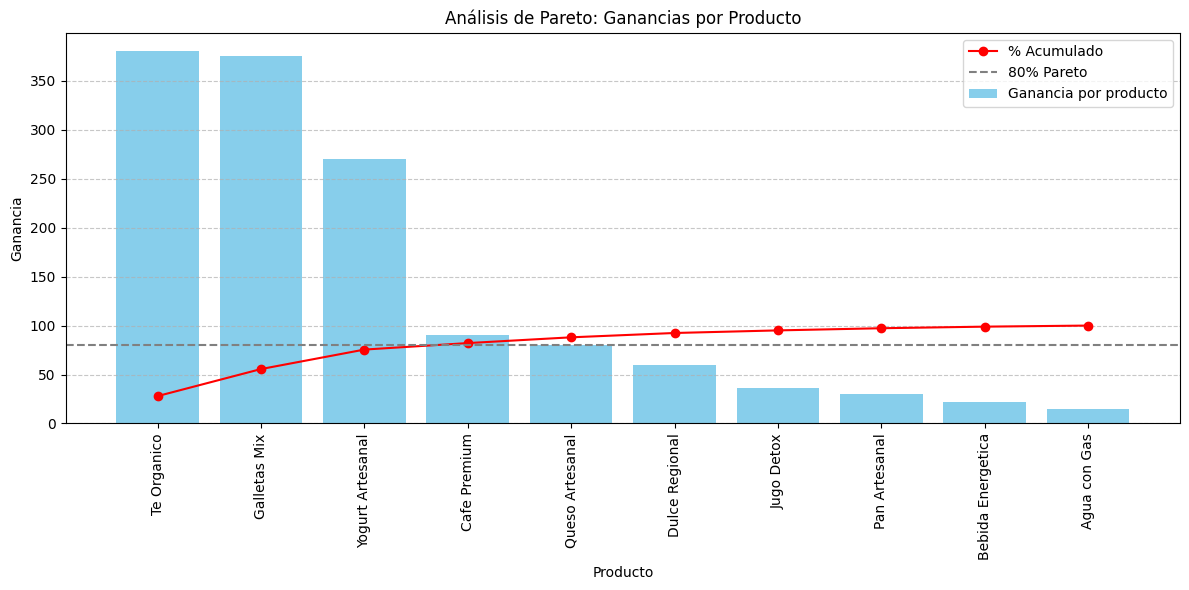

In [9]:
import matplotlib.pyplot as plt

# Configuración de estilo
plt.figure(figsize=(12, 6))

# Barra de ganancias
plt.bar(resumen['producto'], resumen['ganancias'], color='skyblue', label='Ganancia por producto')

# Línea acumulada
plt.plot(resumen['producto'], resumen['porcentaje_acumulado'], color='red', marker='o', label='% Acumulado')

# Líneas de referencia 80/20
plt.axhline(80, color='gray', linestyle='--', label='80% Pareto')
plt.xticks(rotation=90)
plt.title('Análisis de Pareto: Ganancias por Producto')
plt.xlabel('Producto')
plt.ylabel('Ganancia')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


5) Marcar productos que componen el 80% de las ganancias

In [10]:
resumen['top_80'] = resumen['porcentaje_acumulado'] <= 80


6) Mostrar los productos top 80%

In [11]:
top_80_productos = resumen[resumen['top_80']]
print(f"Cantidad de productos que generan el 80% de la ganancia: {len(top_80_productos)}")
print("\nProductos que forman parte del 80% de la ganancia:")
print(top_80_productos[['producto', 'ganancias', 'porcentaje_acumulado']])


Cantidad de productos que generan el 80% de la ganancia: 3

Productos que forman parte del 80% de la ganancia:
           producto  ganancias  porcentaje_acumulado
8       Te Organico      380.0             27.982327
4      Galletas Mix      375.0             55.596465
9  Yogurt Artesanal      270.0             75.478645


7) Resumen visual actualizado

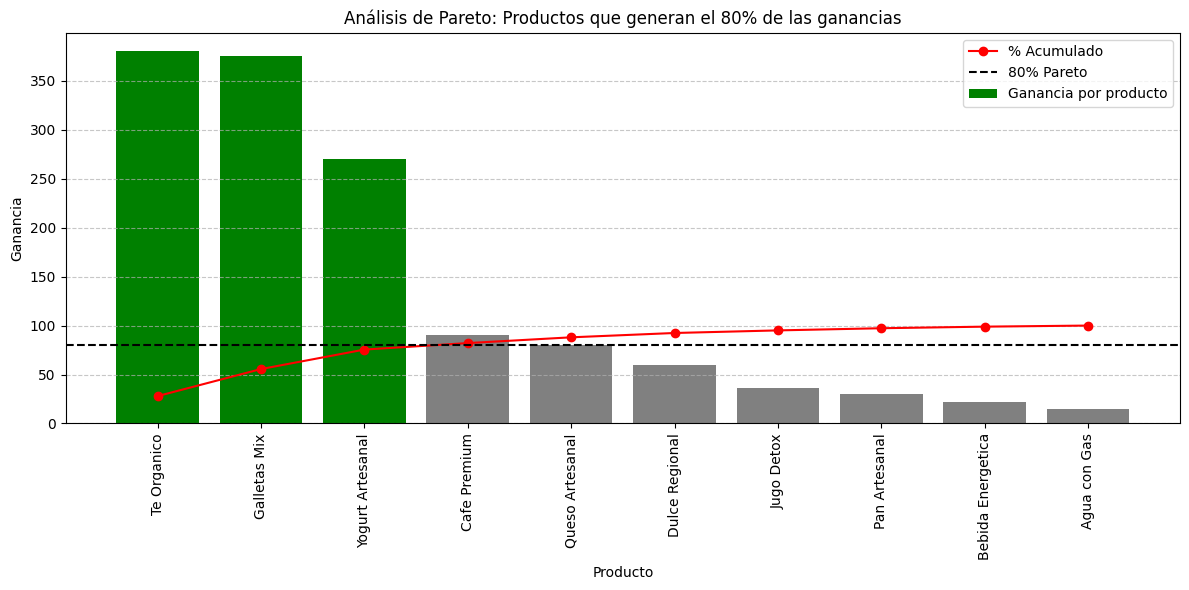

In [12]:
# Gráfico con colores diferenciados
plt.figure(figsize=(12, 6))
colores = ['green' if x else 'gray' for x in resumen['top_80']]

# Barras de ganancias coloreadas
plt.bar(resumen['producto'], resumen['ganancias'], color=colores, label='Ganancia por producto')

# Línea acumulada
plt.plot(resumen['producto'], resumen['porcentaje_acumulado'], color='red', marker='o', label='% Acumulado')

# Línea de referencia
plt.axhline(80, color='black', linestyle='--', label='80% Pareto')
plt.xticks(rotation=90)
plt.title('Análisis de Pareto: Productos que generan el 80% de las ganancias')
plt.xlabel('Producto')
plt.ylabel('Ganancia')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
